<a href="https://colab.research.google.com/github/MrDadzie/Sepsis_Classification_Project/blob/master/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General




#Setup


#Installation


In [1]:
!pip install pandas_profiling
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=d8756ab40e4dc9521424aafa9ec3cf44db23c498c60f22083e321457140f337f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

#Importation

In [2]:
# Data handling
import pandas as pd
import numpy as np
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import os

# EDA (pandas-profiling, etc. )
from pandas_profiling import ProfileReport
from IPython.display import display

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew
from sklearn.pipeline import Pipeline

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Evaluation Metrics
from sklearn.metrics import f1_score, recall_score, precision_score, fbeta_score, accuracy_score, roc_auc_score
import shap
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import pickle
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-3197cc40a63f>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#Data Loading

In [3]:
train_data_url = 'https://raw.githubusercontent.com/MrDadzie/Sepsis_Classification_Project/master/Datasets/Patients_Files_Train.csv'
test_data_url = 'https://raw.githubusercontent.com/MrDadzie/Sepsis_Classification_Project/master/Datasets/Patients_Files_Test.csv'

In [4]:
train_df = pd.read_csv(train_data_url)
test_df = pd.read_csv(test_data_url)

In [5]:
print(train_df.head())
print(test_df.head())

          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0


#Exploratory Data Analysis : EDA

##Renaming Columns
Here, the columns are renamed to help in understanding the fields in the dataset.


In [6]:
new_column_names = {'PRG':'Plasma Glucose',
               'PL': 'Blood Work Result-1',
               'PR': 'Blood Pressure',
               'SK': 'Blood Work Result-2',
               'TS': 'Blood Work Result-3',
               'M11': 'Body mass index',
               'BD2': 'Blood Work Result-4'


}

train_df.rename(columns = new_column_names, inplace = True)
test_df.rename (columns = new_column_names, inplace = True)

##Data Overview

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   599 non-null    object 
 1   Plasma Glucose       599 non-null    int64  
 2   Blood Work Result-1  599 non-null    int64  
 3   Blood Pressure       599 non-null    int64  
 4   Blood Work Result-2  599 non-null    int64  
 5   Blood Work Result-3  599 non-null    int64  
 6   Body mass index      599 non-null    float64
 7   Blood Work Result-4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma Glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood Work Result-1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood Work Result-2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood Work Result-3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body mass index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood Work Result-4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


##Hypothesis

**Null Hypothesis**: There is no significant difference in the likelihood of young and old patients developing sepssis.

**Alternate Hypothesis** : The likelihood of young patients developing sepssis differs significantly from that of old patients.

####Testing

In [9]:
#Older patients > 40
Older_pos = train_df[(train_df['Age']> 40) & (train_df['Sepssis']=='Positive')]
Older_neg = train_df[(train_df['Age']> 40) & (train_df['Sepssis']=='Negative')]
Old = [len(Older_pos), len(Older_neg)]

#Younger patients < 40
Young_pos = train_df[(train_df['Age']< 40) & (train_df['Sepssis']=='Positive')]
Young_neg = train_df[(train_df['Age']< 40) & (train_df['Sepssis']=='Negative')]
Young = [len(Young_pos), len(Young_neg)]


In [10]:
#Creating  contingency table
observed = np.array([Young, Old])

#Using the Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

#Results
alpha = 0.05

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Contingency table of expected frequencies:")
print(expected)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the likelihood of young and old patients developing sepsis.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of young and old patients developing sepsis.")



Chi-square statistic: 22.70032513740257
P-value: 1.893358300456099e-06
Degrees of freedom: 1
Contingency table of expected frequencies:
[[154.41285956 288.58714044]
 [ 51.58714044  96.41285956]]
Reject the null hypothesis: There is a significant difference in the likelihood of young and old patients developing sepsis.


#Univariate Analysis

In [11]:
train_df.columns


Index(['ID', 'Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

##

In [12]:
col_names  = train_df.iloc[:,:-2].select_dtypes(include= np.number).columns
col_names

Index(['Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object')

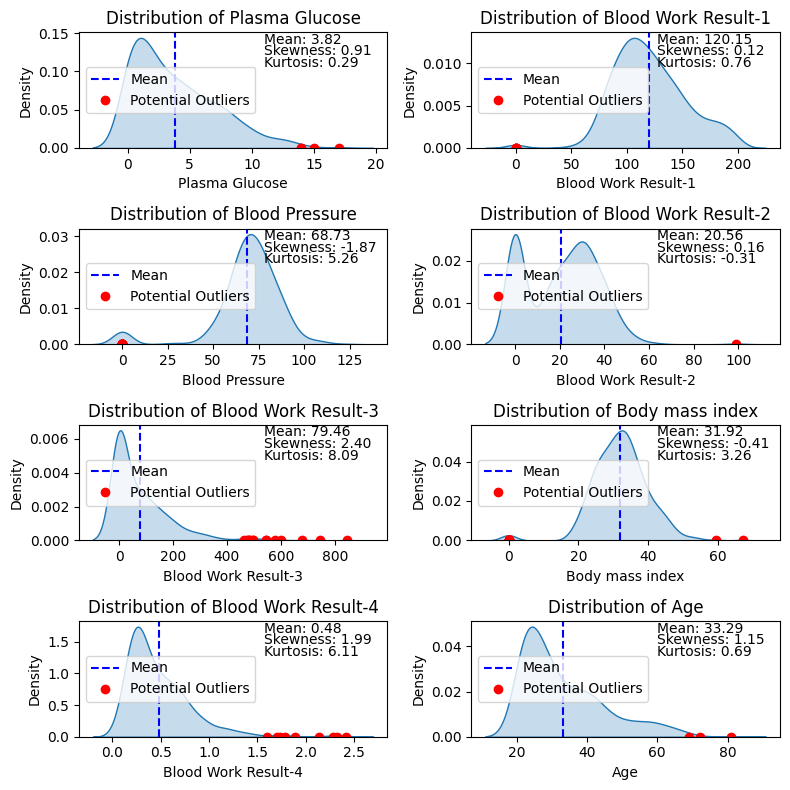

In [13]:
#Visualizing the distribution of the numerical columns using the KDE plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))  # 2x4 grid

for i, col in enumerate(col_names):
    row_index = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index

    sns.kdeplot(data=train_df, x=col, ax=axes[row_index, col_index], fill=True)
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Density')

    mean_val = train_df[col].mean()
    skewness_val = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()

    axes[row_index, col_index].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[row_index, col_index].transAxes)
    axes[row_index, col_index].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[row_index, col_index].transAxes)
    axes[row_index, col_index].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[row_index, col_index].transAxes)

    axes[row_index, col_index].axvline(mean_val, color='blue', linestyle='--', label='Mean')

    outliers = train_df[(train_df[col] > mean_val + 3 * train_df[col].std()) | (train_df[col] < mean_val - 3 * train_df[col].std())]
    axes[row_index, col_index].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')

    axes[row_index, col_index].legend(loc = "center left")

plt.tight_layout()
plt.show()



Insights:


*   List
*   List item



## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

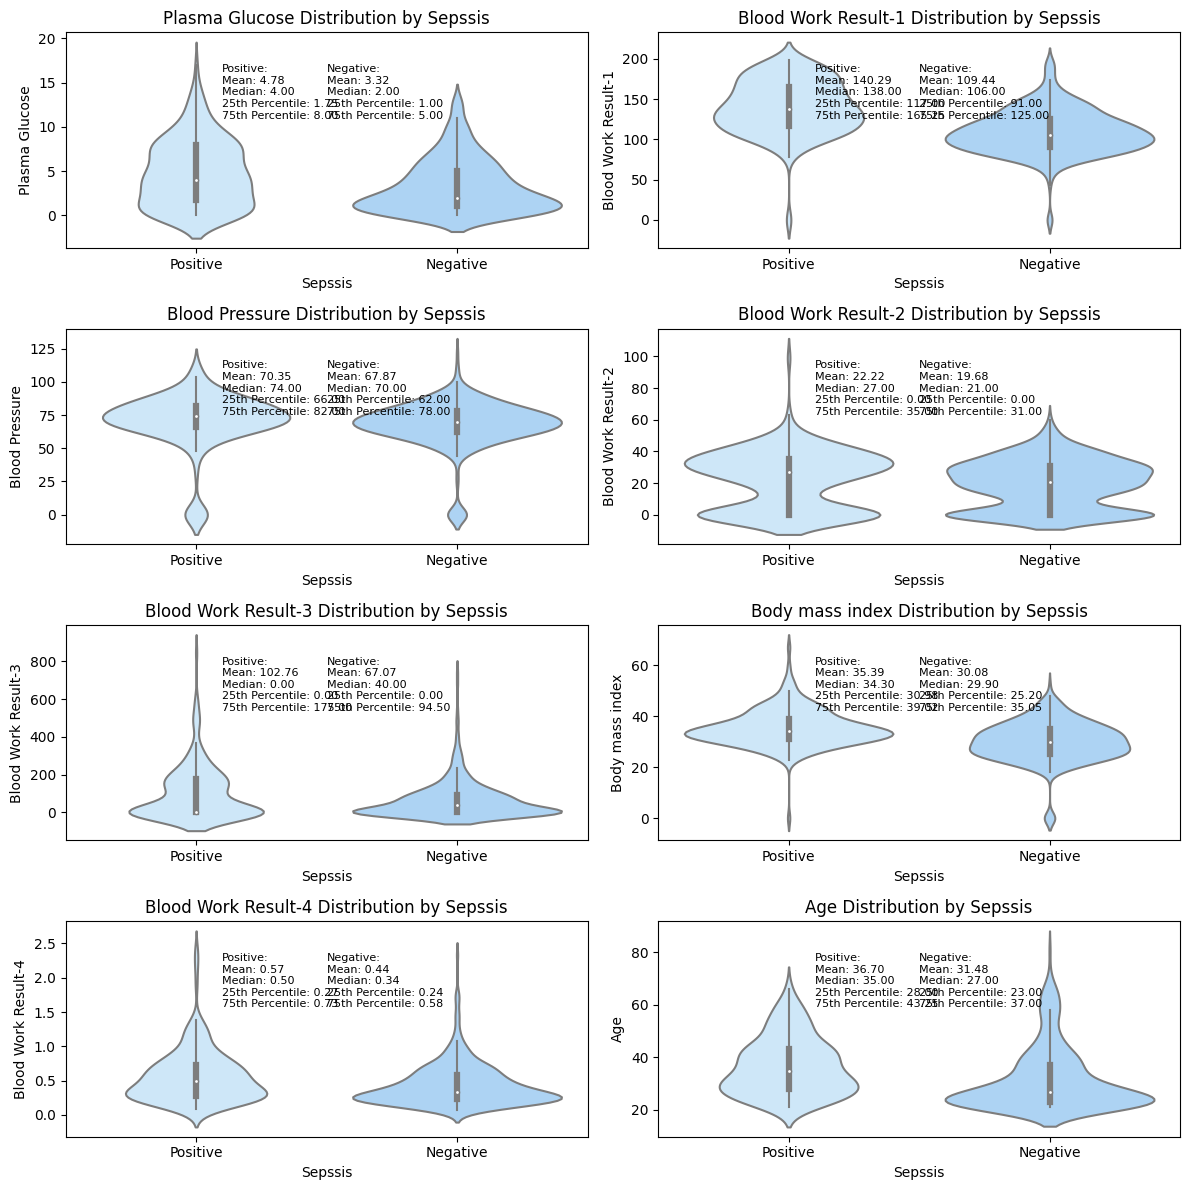

In [14]:
# Visualizing the distribution of the variables with respect to the target variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))  # 2x4 grid

# Defining the custom color palettes
color_palette = ['#c7e9ff', '#a1d4ff', '#7ac0ff', '#55abff', '#3296ff']

for i, col in enumerate(col_names):
    row_index = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index

    sns.violinplot(data=train_df, x='Sepssis', y=col, ax=axes[row_index, col_index], palette=color_palette)
    axes[row_index, col_index].set_xlabel('Sepssis')  # Setting xlabel for the specific subplot
    axes[row_index, col_index].set_ylabel(col)
    axes[row_index, col_index].set_title(f'{col} Distribution by Sepssis')

    # Calculate statistics
    positive_vals = train_df[train_df['Sepssis'] == 'Positive'][col]
    negative_vals = train_df[train_df['Sepssis'] == 'Negative'][col]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }

    # Add statistics as text annotations
    axes[row_index, col_index].text(0.3, 0.6, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=axes[row_index, col_index].transAxes, color='black',fontsize = 8)
    axes[row_index, col_index].text(0.5, 0.6, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=axes[row_index, col_index].transAxes, color='black', fontsize = 8)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


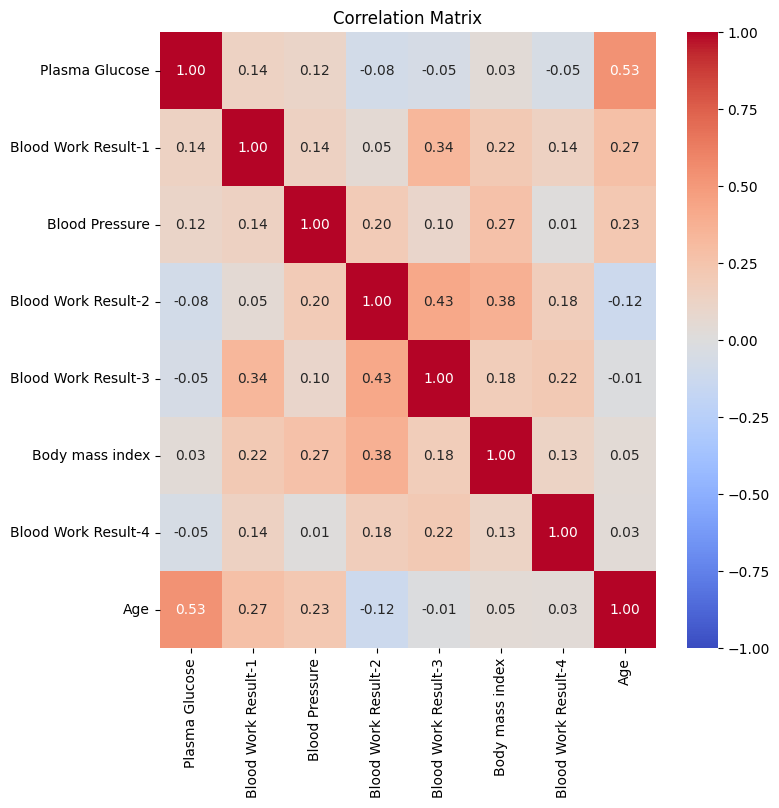

In [15]:
# Visualizing the correlation between the  numerical features
corr_matrix = train_df.iloc[:,:-2].corr()

#Generating heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


* Plasma Glucose of patients shows a relatively stronger positive correlation with the age of the patients.
* Beyond this, all features show a weak correlation with each other.




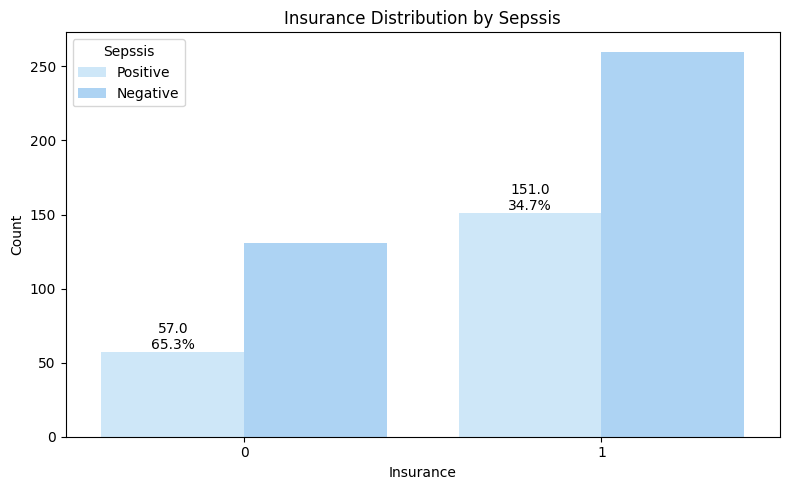

In [16]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=var, hue='Sepssis', palette=color_palette)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate percentage distribution
    total = len(train_df['Sepssis'])
    percentages = train_df['Sepssis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [17]:
# Check for duplicate rows in train_df
train_duplicate_rows = train_df.duplicated()
print("Number of duplicate rows in train_df:", train_duplicate_rows.sum())

# Check for duplicate rows in test_df
test_duplicate_rows = test_df.duplicated()
print("Number of duplicate rows in test_df:", test_duplicate_rows.sum())

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0


## Impute Missing Values

In [18]:
# Use pandas.DataFrame.drop_duplicates method
missing_traindf = train_df.isna().sum()
missing_testdf = test_df.isna().sum()
print(missing_traindf, missing_testdf)

ID                     0
Plasma Glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
Sepssis                0
dtype: int64 ID                     0
Plasma Glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
dtype: int64


### Insights:



*   There are no duplicated rows in both the train and test datasets
*   Again, there are no missing values in both datasets



## Features Encoding

In [19]:
# From sklearn.preprocessing use LabelEncoder to encode the categorical features.
def encode_target_variable(data, target_variable):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    encoded_target = label_encoder.fit_transform(data[target_variable])
    target_encoded = pd.DataFrame(encoded_target, columns=[target_variable])

    # Combine the features and the encoded target variable
    data_encoded = pd.concat([data.iloc[:, :-1], target_encoded], axis=1)
    data_encoded.drop('ID', axis=1, inplace=True)

    return data_encoded

In [20]:
# Encode target variable in train data
train_df_encoded = encode_target_variable(train_df, 'Sepssis')

# Print the encoded train data
print(train_df_encoded.head())

   Plasma Glucose  Blood Work Result-1  Blood Pressure  Blood Work Result-2  \
0               6                  148              72                   35   
1               1                   85              66                   29   
2               8                  183              64                    0   
3               1                   89              66                   23   
4               0                  137              40                   35   

   Blood Work Result-3  Body mass index  Blood Work Result-4  Age  Insurance  \
0                    0             33.6                0.627   50          0   
1                    0             26.6                0.351   31          0   
2                    0             23.3                0.672   32          1   
3                   94             28.1                0.167   21          1   
4                  168             43.1                2.288   33          1   

   Sepssis  
0        1  
1        0  
2    

## Dataset Splitting

In [21]:
def split_data(X, y, test_size, random_state=42, stratify=None):
    # Split the data into train and validation sets
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

    return X_train, X_eval, y_train, y_eval

# Split the data into train and validation sets for both X and y
X_train, X_eval, y_train, y_eval = split_data(train_df_encoded.iloc[:, :-1], train_df_encoded.iloc[:, -1:], test_size=0.2, random_state=42, stratify=train_df_encoded.iloc[:, -1:])

# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_eval shape:", y_eval.shape)

X_train shape: (479, 9)
y_train shape: (479, 1)
X_eval shape: (120, 9)
y_eval shape: (120, 1)


## Features Scaling

In [22]:
scaler  = StandardScaler()

#Applying Scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

#Applying the scaler on the evaluation set
X_eval_scaled = scaler.transform(X_eval)

## Optional: Train Dataset Balancing

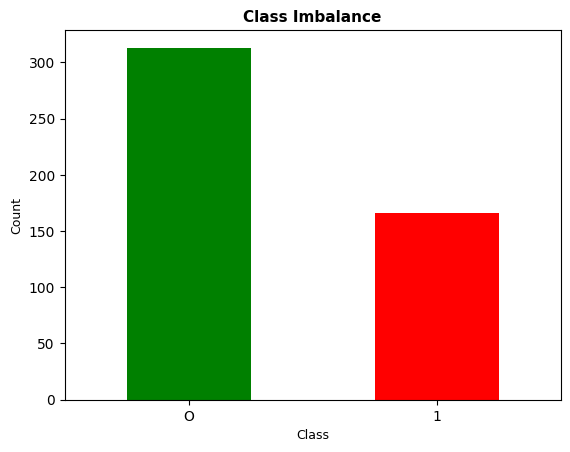

In [23]:
class_counts = y_train.value_counts()
class_counts.index =['O','1']

class_colors = ['green','red']

# Create a bar plot
ax = class_counts.plot(kind='bar',color = class_colors)
plt.title('Class Imbalance', fontsize=11, fontweight='bold')
plt.xlabel('Class', fontsize=9)
plt.ylabel('Count', fontsize=9)

#Rotate the labels on the x_axis
ax.set_xticklabels(class_counts.index, rotation= 0)
plt.show()

Clearly, there's an imbalance in the dataset. The best strategy is to oversample the negative class.

In [24]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html
oversample= SMOTE()
X_train_resampled,y_train_resampled= oversample.fit_resample(X_train_scaled, y_train)
X_train_resampled.shape,y_train_resampled.shape

((626, 9), (626, 1))

In [25]:
#Checking to see if the tarhet variables are balanced
y_train_resampled.value_counts()

Sepssis
0          313
1          313
dtype: int64

The target variables are balanced.

# Machine Learning Modeling
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001 logistic_regression

In [26]:
#Instantiating the model
lr_model = LogisticRegression(random_state = 42)

#Training the model
lr_model.fit(X_train_resampled,y_train_resampled)

LogisticRegression(random_state=42)

In [27]:
#Predictions on evaluation set
lr_model_preds = lr_model.predict(X_eval_scaled)

# Calculate evaluation metrics
lr_f1_score = f1_score(y_eval, lr_model_preds)
lr_recall = recall_score(y_eval, lr_model_preds)
lr_precision = precision_score(y_eval, lr_model_preds)
lr_f2_score = fbeta_score(y_eval, lr_model_preds, beta=2)
lr_accuracy = accuracy_score(y_eval, lr_model_preds)

# Calculate AUC score
lr_auc_score = roc_auc_score(y_eval, lr_model_preds)

In [28]:
print("F1 Score:", lr_f1_score)
print("Recall Score:", lr_recall)
print("Precision Score:", lr_precision)
print("F2 Score:", lr_f2_score)
print("Accuracy Score:", lr_accuracy)
print("ROC AUC Score:", lr_auc_score)

F1 Score: 0.6458333333333334
Recall Score: 0.7380952380952381
Precision Score: 0.5740740740740741
F2 Score: 0.6981981981981982
Accuracy Score: 0.7166666666666667
ROC AUC Score: 0.7216117216117215


## Simple Model #002 Decision trees

In [29]:
#Instantiating the model
tree_classifier = DecisionTreeClassifier()

#Training Model
tree_classifier.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [32]:
#Predictions on Evaluation set
tree_classifier_preds = tree_classifier.predict(X_eval_scaled)

# Calculate evaluation metrics
tree_classifier_f1_score = f1_score(y_eval, tree_classifier_preds)
tree_classifier_recall = recall_score(y_eval, tree_classifier_preds)
tree_classifier_precision = precision_score(y_eval, tree_classifier_preds)
tree_classifier_f2_score = fbeta_score(y_eval, tree_classifier_preds, beta=2)
tree_classifier_accuracy = accuracy_score(y_eval, tree_classifier_preds)

# Calculate AUC score
tree_classifier_auc_score = roc_auc_score(y_eval, tree_classifier_preds)


In [33]:
print("F1 Score:", tree_classifier_f1_score)
print("Recall Score:", tree_classifier_recall)
print("Precision Score:", tree_classifier_precision)
print("F2 Score:", tree_classifier_f2_score)
print("Accuracy Score:", tree_classifier_accuracy)
print("ROC AUC Score:", tree_classifier_auc_score)

F1 Score: 0.5116279069767442
Recall Score: 0.5238095238095238
Precision Score: 0.5
F2 Score: 0.5188679245283019
Accuracy Score: 0.65
ROC AUC Score: 0.6208791208791208


## Simple Model #003 - Random Forest Classifier

In [35]:
#Instantiating the model
rf_classifier = RandomForestClassifier(n_estimators = 10000)

#Training Model
rf_classifier.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(n_estimators=10000)

In [36]:
#Predictions on Evaluation set
rf_classifier_preds = rf_classifier.predict(X_eval_scaled)

# Calculate evaluation metrics
rf_classifier_f1_score = f1_score(y_eval, rf_classifier_preds)
rf_classifier_recall = recall_score(y_eval, rf_classifier_preds)
rf_classifier_precision = precision_score(y_eval, rf_classifier_preds)
rf_classifier_f2_score = fbeta_score(y_eval, rf_classifier_preds, beta=2)
rf_classifier_accuracy = accuracy_score(y_eval, rf_classifier_preds)

# Calculate AUC score
rf_classifier_auc_score = roc_auc_score(y_eval, rf_classifier_preds)

In [38]:
print("F1 Score:", rf_classifier_f1_score)
print("Recall Score:", rf_classifier_recall)
print("Precision Score:", rf_classifier_precision)
print("F2 Score:", rf_classifier_f2_score)
print("Accuracy Score:", rf_classifier_accuracy)
print("ROC AUC Score:", rf_classifier_auc_score)

F1 Score: 0.6021505376344086
Recall Score: 0.6666666666666666
Precision Score: 0.5490196078431373
F2 Score: 0.639269406392694
Accuracy Score: 0.6916666666666667
ROC AUC Score: 0.6858974358974358


## Simple Model #004 - XGBClassifier

In [40]:
#Instantiating the model
xgb_classifier = XGBClassifier(n_estimators =10000)

#Training Model
xgb_classifier.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
#Predictions on Evaluation set
xgb_classifier_preds = xgb_classifier.predict(X_eval_scaled)

# Calculate evaluation metrics
xgb_classifier_f1_score = f1_score(y_eval, xgb_classifier_preds)
xgb_classifier_recall = recall_score(y_eval, xgb_classifier_preds)
xgb_classifier_precision = precision_score(y_eval, xgb_classifier_preds)
xgb_classifier_f2_score = fbeta_score(y_eval, xgb_classifier_preds, beta=2)
xgb_classifier_accuracy = accuracy_score(y_eval, xgb_classifier_preds)

# Calculate AUC score
xgb_classifier_auc_score = roc_auc_score(y_eval, xgb_classifier_preds)

In [43]:
print("F1 Score:", xgb_classifier_f1_score)
print("Recall Score:", xgb_classifier_recall)
print("Precision Score:", xgb_classifier_precision)
print("F2 Score:", xgb_classifier_f2_score)
print("Accuracy Score:", xgb_classifier_accuracy)
print("ROC AUC Score:", xgb_classifier_auc_score)

F1 Score: 0.5681818181818181
Recall Score: 0.5952380952380952
Precision Score: 0.5434782608695652
F2 Score: 0.5841121495327103
Accuracy Score: 0.6833333333333333
ROC AUC Score: 0.6630036630036631


## Simple Model #005 - Naive Bayes model

In [44]:
#Instantiating the model
nb_classifier = GaussianNB()

#Training Model
nb_classifier.fit(X_train_resampled,y_train_resampled)

GaussianNB()

In [46]:
#Predictions on Evaluation set
nb_classifier_preds = nb_classifier.predict(X_eval_scaled)

# Calculate evaluation metrics
nb_classifier_f1_score = f1_score(y_eval, nb_classifier_preds)
nb_classifier_recall = recall_score(y_eval, nb_classifier_preds)
nb_classifier_precision = precision_score(y_eval, nb_classifier_preds)
nb_classifier_f2_score = fbeta_score(y_eval, nb_classifier_preds, beta=2)
nb_classifier_accuracy = accuracy_score(y_eval, nb_classifier_preds)

# Calculate AUC score
nb_classifier_auc_score = roc_auc_score(y_eval, nb_classifier_preds)

In [47]:
print("F1 Score:", nb_classifier_f1_score)
print("Recall Score:", nb_classifier_recall)
print("Precision Score:", nb_classifier_precision)
print("F2 Score:", nb_classifier_f2_score)
print("Accuracy Score:", nb_classifier_accuracy)
print("ROC AUC Score:", nb_classifier_auc_score)

F1 Score: 0.5869565217391305
Recall Score: 0.6428571428571429
Precision Score: 0.54
F2 Score: 0.6192660550458716
Accuracy Score: 0.6833333333333333
ROC AUC Score: 0.6739926739926739


## Simple Model #006 - Stochastic Gradient Descent

In [48]:
#Instantiating the model
sgd_classifier = SGDClassifier()

#Training Model
sgd_classifier.fit(X_train_resampled,y_train_resampled)

SGDClassifier()

In [49]:
#Predictions on Evaluation set
sgd_classifier_preds = sgd_classifier.predict(X_eval_scaled)

# Calculate evaluation metrics
sgd_classifier_f1_score = f1_score(y_eval, sgd_classifier_preds)
sgd_classifier_recall = recall_score(y_eval, sgd_classifier_preds)
sgd_classifier_precision = precision_score(y_eval, sgd_classifier_preds)
sgd_classifier_f2_score = fbeta_score(y_eval, sgd_classifier_preds, beta=2)
sgd_classifier_accuracy = accuracy_score(y_eval, sgd_classifier_preds)

# Calculate AUC score
sgd_classifier_auc_score = roc_auc_score(y_eval, sgd_classifier_preds)

In [50]:
print("F1 Score:", sgd_classifier_f1_score)
print("Recall Score:", sgd_classifier_recall)
print("Precision Score:", sgd_classifier_precision)
print("F2 Score:", sgd_classifier_f2_score)
print("Accuracy Score:", sgd_classifier_accuracy)
print("ROC AUC Score:", sgd_classifier_auc_score)

F1 Score: 0.5454545454545454
Recall Score: 0.6428571428571429
Precision Score: 0.47368421052631576
F2 Score: 0.6
Accuracy Score: 0.625
ROC AUC Score: 0.6291208791208791


## Models comparison

In [51]:
results = {'model': ['Logistic Regression','Decision Tree', 'Random Forest','XGBoost','Naive Bayes','Stochastic Gradient Descent'],
           'f1_score': [lr_f1_score, tree_classifier_f1_score,rf_classifier_f1_score,xgb_classifier_f1_score,nb_classifier_f1_score,sgd_classifier_f1_score],
           'Details': ['','','','','','']}

results_df = pd.DataFrame(results)

In [52]:
results_df.sort_values(by = 'f1_score', ascending = False)

,model,f1_score,Details
0,Logistic Regression,0.645833,
2,Random Forest,0.602151,
4,Naive Bayes,0.586957,
3,XGBoost,0.568182,
5,Stochastic Gradient Descent,0.545455,
1,Decision Tree,0.511628,


The best performing models are the Logistic Regression Model, Random_Forest and Naive Bayes and XGB model

## Hyperparameters tuning

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

###### Logistic Regression

In [62]:
# Define the hyperparameters grid
param_grid = {
        'C': [10, 30, 50, 70, 80, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [10, 20, 30, 40, 50]
    }

# Define scoring metrics
scoring = {
        'F1': 'f1',
        'ROC AUC': 'roc_auc'
    }

In [63]:
# Perform grid search to find the best hyperparameters
lr_grid_search = GridSearchCV(estimator = lr_model, param_grid = param_grid, scoring=scoring, cv=5, refit='F1')
lr_grid_search.fit(X_train_resampled, y_train_resampled)

# Create a dictionary to store the results
lr_tuned_results = {
        'best_params': lr_grid_search.best_params_,
        'best_estimator': lr_grid_search.best_estimator_,
        'best_f1_score': lr_grid_search.best_score_,
        'best_roc_auc_score': roc_auc_score(y_train_resampled, lr_grid_search.predict_proba(X_train_resampled)[:, 1])
    }

In [64]:
lr_tuned_results

{'best_params': {'C': 10,
  'max_iter': 10,
  'penalty': 'l1',
  'solver': 'liblinear'},
 'best_estimator': LogisticRegression(C=10, max_iter=10, penalty='l1', random_state=42,
                    solver='liblinear'),
 'best_f1_score': 0.7465151581148171,
 'best_roc_auc_score': 0.8454000755340976}

##### Random Forest Classifier

In [69]:
# Define the hyperparameters grid
param_grid = {
        'n_estimators': [100,1000],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2,5,4],
        'min_samples_leaf': [1,2,4] ,
        'max_features':['auto','sqrt','log2']
    }

# Define scoring metrics
scoring = {
        'F1': 'f1',
        'ROC AUC': 'roc_auc'
    }

In [70]:
# Perform grid search to find the best hyperparameters
rf_grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, scoring=scoring, cv=5, refit='F1')
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Create a dictionary to store the results
rf_tuned_results = {
        'best_params': rf_grid_search.best_params_,
        'best_estimator': rf_grid_search.best_estimator_,
        'best_f1_score': rf_grid_search.best_score_,
        'best_roc_auc_score': roc_auc_score(y_train_resampled, rf_grid_search.predict_proba(X_train_resampled)[:, 1])
    }

In [71]:
rf_tuned_results

{'best_params': {'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 100},
 'best_estimator': RandomForestClassifier(min_samples_split=4),
 'best_f1_score': 0.8293951594193999,
 'best_roc_auc_score': 1.0}

##### Naive Bayes

In [74]:
# Define the hyperparameters grid
param_grid = {
    'priors': [None, [0.1, 0.3, 0.6]],
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
# Define scoring metrics
scoring = {
        'F1': 'f1',
        'ROC AUC': 'roc_auc'
    }

In [75]:
# Perform grid search to find the best hyperparameters
nb_grid_search = GridSearchCV(estimator = nb_classifier, param_grid = param_grid, scoring=scoring, cv=5, refit='F1')
nb_grid_search.fit(X_train_resampled, y_train_resampled)

# Create a dictionary to store the results
nb_tuned_results = {
        'best_params': nb_grid_search.best_params_,
        'best_estimator': nb_grid_search.best_estimator_,
        'best_f1_score': nb_grid_search.best_score_,
        'best_roc_auc_score': roc_auc_score(y_train_resampled, nb_grid_search.predict_proba(X_train_resampled)[:, 1])
    }

In [76]:
nb_tuned_results

{'best_params': {'priors': None, 'var_smoothing': 1e-09},
 'best_estimator': GaussianNB(),
 'best_f1_score': 0.7434927258470131,
 'best_roc_auc_score': 0.8512794863681369}

#### XGB Classifier

In [77]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
}

# Define scoring metrics
scoring = {
        'F1': 'f1',
        'ROC AUC': 'roc_auc'
    }

In [78]:
# Perform grid search to find the best hyperparameters
xgb_grid_search = GridSearchCV(estimator = xgb_classifier, param_grid = param_grid, scoring=scoring, cv=5, refit='F1')
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

# Create a dictionary to store the results
xgb_tuned_results = {
        'best_params': xgb_grid_search.best_params_,
        'best_estimator': xgb_grid_search.best_estimator_,
        'best_f1_score': xgb_grid_search.best_score_,
        'best_roc_auc_score': roc_auc_score(y_train_resampled, nb_grid_search.predict_proba(X_train_resampled)[:, 1])
    }

In [79]:
xgb_tuned_results

{'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
 'best_estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'best_f1_score': 0.8091653396702106,
 'best_roc_auc_score': 0.8512794863681369}

## Hyperparameter tuning results comparison

In [80]:

results_new= {'model':['Logistic_Regression','Random Forest','SGD Classifier','XGB Classifier'],
         'f1_score':[lr_tuned_results['best_f1_score'],rf_tuned_results['best_f1_score'],nb_tuned_results['best_f1_score'],xgb_tuned_results['best_f1_score']],
         'AUC_score':[lr_tuned_results['best_roc_auc_score'],rf_tuned_results['best_roc_auc_score'],nb_tuned_results['best_roc_auc_score'],xgb_tuned_results['best_roc_auc_score']]}

results_new_df= pd.DataFrame(results_new)

results_new_df.sort_values(by= 'f1_score', ascending = False)

,model,f1_score,AUC_score
1,Random Forest,0.829395,1.000000
3,XGB Classifier,0.809165,0.851279
0,Logistic_Regression,0.746515,0.845400
2,SGD Classifier,0.743493,0.851279


From the table above , the best performing model is the Random Forest Classifier.


### Evaluation on Test Data

In [82]:
model = rf_tuned_results['best_estimator']
model

RandomForestClassifier(min_samples_split=4)

In [100]:
#Preprocessing  the test_data
X_test_scaled = scaler.transform(test_df)

In [103]:
#Running Predictions on the test data
test_preds = model.predict(X_test_scaled)
test_preds

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [107]:
#Saving Test Presdictions
test_predictions = pd.DataFrame(test_preds, columns = ['Sepsis'])
test_predictions.to_csv('test_predictions.csv')

# Export Key Components

In [111]:
# Get the current working directory
cwd = os.getcwd()

# Specify the relative path to the destination directory
destination = os.path.join(cwd, "Assets")

# Create the "export" directory if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Export the scaler
scaler_filepath = os.path.join(destination, "scaler.joblib")
dump(scaler, scaler_filepath)

# Export the random forest classifier
model_filepath = os.path.join(destination, "model.joblib")
dump(model, model_filepath)

# Print the paths to the exported components
print(f"Numerical Imputer exported to: {imputer_filepath}")
print(f"Scaler exported to: {scaler_filepath}")
print(f"Random Classifier exported to: {model_filepath}")

Numerical Imputer exported to: /content/Assets/numerical_imputer.joblib
Scaler exported to: /content/Assets/scaler.joblib
Random Classifier exported to: /content/Assets/model.joblib


In [113]:
#Exporting all libraries
!pip list --format=freeze >Assets/requirements.txt